# Calibrating the HAT-P-1b NIRISS/SOSS observations with the JWST Pipeline
--------------------------------------------------------------
**Author**: Néstor Espinoza (nespinoza@stsci.edu) | **Latest update**: May 25, 2020.

## Table of contents
1. [Introduction](#intro)
2. [Passing the data through the JWST calibration pipeline](#jwstpipeline)
3. [Extracting the spectra](#extraction)
4. [Exoploring the data products](#exploringproducts)

1.<font color='white'>-</font>Introduction <a class="anchor" id="intro"></a>
------------------

Given a simulated or real dataset, we now have to calibrate it using the [JWST calibration pipeline](https://github.com/spacetelescope/jwst) (simply defined as the "JWST pipeline", from now on), as the raw, uncalibrated data has non-linearity effects, instrumental and astrophysical background, etc. that we want to calibrate/remove/take care of before reducing the data. As it is explained in the [pipeline documentation](https://jwst-pipeline.readthedocs.io/en/latest/index.html), the JWST pipeline consists of three stages: the first performs detector-level corrections and performs the actual fits to the ramps of individual integrations, the second one performs instrument-speciic calibrations and the third stage combines that data in order to produce a final product.

If you haven't installed the pipeline yet, this is the time to do it. The steps are very simple; just pip-install the latest version of the [JWST pipeline from the Github repo](https://github.com/spacetelescope/jwst), and then set some enviornment data so the pipeline knows where to get the reference data to perform the reductions (see below). If in Mac OSX, for example, you have to do in a terminal:

`export CRDS_PATH=$HOME/crds_cache`

`export CRDS_SERVER_URL=https://jwst-crds.stsci.edu`

And then you are all set!

2.<font color='white'>-</font>Passing the data through the JWST calibration pipeline <a class="anchor" id="jwstpipeline"></a>
------------------

Let's pass our uncalibrated data through the JWST calibration pipeline. We'll pass it through stages 1 and 2, and extract the spectra from these products with our own algorithm in the next section.

In [1]:
from specialsoss import SossExposure
filename = "data30_uncal.fits"
obs = SossExposure(filename)
obs.calibrate()

'uncal' file loaded from data30_uncal.fits
Looks like you have initialized an 'uncal' file! To pipeline process it, run 'SossExposure.uncal.calibrate()' method.


2020-05-28 15:58:34,158 - CRDS - INFO -  Fetching  /Users/nespinoza/crds_cache/mappings/jwst/jwst_niriss_apcorr_0003.rmap    4.1 K bytes  (1 / 5 files) (0 / 13.4 K bytes)
2020-05-28 15:58:34,303 - CRDS - INFO -  Fetching  /Users/nespinoza/crds_cache/mappings/jwst/jwst_niriss_0128.imap    2.2 K bytes  (2 / 5 files) (4.1 K / 13.4 K bytes)
2020-05-28 15:58:34,442 - CRDS - INFO -  Fetching  /Users/nespinoza/crds_cache/mappings/jwst/jwst_miri_apcorr_0004.rmap    4.3 K bytes  (3 / 5 files) (6.3 K / 13.4 K bytes)
2020-05-28 15:58:34,584 - CRDS - INFO -  Fetching  /Users/nespinoza/crds_cache/mappings/jwst/jwst_miri_0204.imap    2.2 K bytes  (4 / 5 files) (10.6 K / 13.4 K bytes)
2020-05-28 15:58:34,723 - CRDS - INFO -  Fetching  /Users/nespinoza/crds_cache/mappings/jwst/jwst_0619.pmap      615 bytes  (5 / 5 files) (12.8 K / 13.4 K bytes)
2020-05-28 15:58:34,961 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-05-

2020-05-28 15:58:35,230 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'data30_uncal.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias']
2020-05-28 15:58:35,235 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/Users/nespinoza/crds_cache/references/jwst/niriss/jwst_niriss_dark_0114.fits'.
2020-05-28 15:58:35,236 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/Users/nespinoza/crds_cache/references/jwst/niriss/jwst_niriss_gain_0005.fits'.
2020-05-28 15:58:35,237 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/Users/nespinoza/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0011.fits'.
2020-05-28 15:58:35,238 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/Users/nespinoza/crds_cache/references/jwst/niriss/jwst_niriss_mask_0013.fits'.
2020-05-28 15:58:35,239 - stpipe.Detector1Pipeline - I

2020-05-28 15:58:37,233 - stpipe.Detector1Pipeline.linearity - INFO - Extracting linearity subarray to match science data
2020-05-28 15:58:37,332 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2020-05-28 15:58:37,467 - stpipe.Detector1Pipeline.persistence - INFO - Step persistence running with args (<RampModel(5, 3, 256, 2048) from data30_uncal.fits>,).
2020-05-28 15:58:37,469 - stpipe.Detector1Pipeline.persistence - INFO - Step persistence parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True}
2020-05-28 15:58:37,470 - stpipe.Detector1Pipeline.persistence - INFO - Step skipped.
2020-05-28 15:58:37,472 - stpipe.Detector1Pipeline.persistence - INFO - Step pe

2020-05-28 15:59:56,439 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-05-28 15:59:56,443 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-05-28 15:59:56,705 - stpipe.Detector1Pipeline - INFO - Saved model in data30_rateints.fits
2020-05-28 15:59:56,706 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2020-05-28 15:59:56,773 - stpipe.Detector1Pipeline - INFO - Saved model in data30_rate.fits
2020-05-28 15:59:56,774 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


Not sure how to calibrate a 'uncal' file right now.


2020-05-28 15:59:56,844 - stpipe - WARNING - /Users/nespinoza/anaconda3/envs/exoctk-3.7/lib/python3.7/site-packages/pkg_resources/__init__.py:1146: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name



'ramp' file loaded from data30_ramp.fits
'rate' file loaded from data30_rate.fits
'rateints' file loaded from data30_rateints.fits


As explained above, once we've passed through the JWST calibration pipeline, we'll perform the extraction on our own using [specialsoss](https://github.com/hover2pi/specialsoss). This algorithm works on the `rateints` products from the JWST calibration pipeline, which contains the rates (i.e., electrons/second) of each integration (which is our "image" on which we'll perform the spectral extraction). Let's take a look at the `rateints` products first before performing the extraction:


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
hdul = fits.open('data30_rateints.fits')
# Print headers:
print(hdul[0].header.keys)
# Print data shape:
data = hdul[1].data
print('\nData shape:',data.shape)

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-05-28T15:59:56.499' / UTC date file created                     
FILENAME= 'data30_rateints.fits' / Name of the file                             
CAL_VER = '0.16.1  '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'CubeModel'          / Type of data model                             
TELESCOP= 'JWST    '           / Telescope used to acquire the data             
                                                                                
        Observation identifiers                                                 

As can be seen, the headers of this file contain additional information below the `CRDS parameters`, which lists where all the data was obtained to calibrate the uncalibrated data. All of them come from the [JWST Calibration Reference Data System (CRDS)](https://jwst-crds.stsci.edu/), and you can inspect those products yourself to make sure the reduction is using the most up-to-date calibration files. Also, as seen at the end, the shape of the `rateints` product is of dimensions $(N_\textrm{integrations},S,M)$. Let's explore the `rateints` "image" of the first integration:

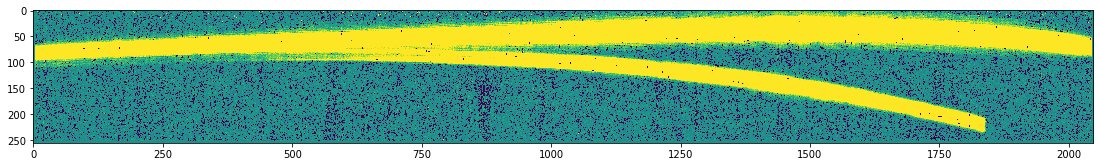

In [4]:
plt.figure(figsize=(19,4))
im = plt.imshow(data[0,:,:])
im.set_clim(-1,1)

Notice this is much better than the uncalibrated data (see previous notebook)! Most of the structure of the data outside the traces has been removed, which is a good sign that everything is working more or less as expected. Let's now jump into the extraction of the spectra from these data.

3.<font color='white'>-</font>Extracting the spectra <a class="anchor" id="extraction"></a>
------------------

To perform the spectral extraction, we'll use [`specialsoss`](https://github.com/hover2pi/specialsoss). There are different ways of extracting the spectra using this package; the simplest is a normal "sum" of the spectrum following the trace. Let's try that method out using the `rateints` data products from the JWST pipeline:

In [8]:
obs.extract('bin', 'rateints', name='Extracted Spectrum')

2020-05-28 15:31:13,362 - stpipe - WARNING - /Users/nespinoza/anaconda3/envs/exoctk-3.7/lib/python3.7/site-packages/pkg_resources/__init__.py:1146: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name

2020-05-28 15:31:13,520 - stpipe - WARNING - /Users/nespinoza/anaconda3/envs/exoctk-3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-05-28 15:31:13,522 - stpipe - WARNING - /Users/nespinoza/anaconda3/envs/exoctk-3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)



ValueError: Object arrays cannot be loaded when allow_pickle=False

When the extraction is produced, the results will be saved to the `obs.results` dictionary, which has an `Extracted Spectrum` key that we can use to take a look at the results. This key, in turn, has two possible keys: `wavelength`, which states the wavelength of each pixel and `flux`, which has the flux for each pixel on each of the integrations (so this latter one is a $(N_\textrm{{integrations}},M)$ numpy array). Let's plot the spectra of the different integrations up to the fifth integration:

(0.8412576, 2.8310227)

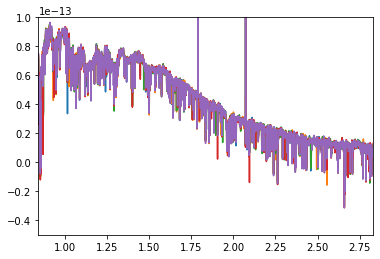

In [7]:
wavelengths = obs.results['Extracted Spectrum']['wavelength']
for i in range(5):
    plt.plot(wavelengths, obs.results['Extracted Spectrum']['flux'][i]+0.1*1e-13)
plt.ylim(-0.5*1e-13,1e-13)
plt.xlim(np.min(wavelengths),np.max(wavelengths))

Note this algorithm returns the spectra from 0.84 to 2.8 microns.